<a href="https://colab.research.google.com/github/nk-mobile/data_analytics_fa/blob/main/winequality_red_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **🍷 Red Wine Quality Analysis & Feature Engineering**

Этот проект посвящён комплексному анализу данных о качестве красного вина на основе датасета Wine Quality Red (UCI ML Repository). В ноутбуке выполнены: разведочный анализ (EDA), инженерия признаков, визуализация зависимостей и интерпретация результатов — всё с акцентом на практическую применимость для виноделия и data science.

**Загрузка датасета wine quality selection и очистка данных**

In [ ]:
# 1. Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Загрузка данных
df = pd.read_csv('winequality-red.csv')

# 3. Базовая информация о датасете
print("Форма датасета:", df.shape)
print("\nПервые 5 строк:")
print(df.head())

print("\nИнформация о столбцах:")
print(df.info())

print("\nСтатистика по признакам:")
print(df.describe())

print("\nУникальные значения качества:")
print(df['quality'].value_counts().sort_index())

Форма датасета: (1599, 12)

Первые 5 строк:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5 

Базовая информация о датасете:
Датасет содержит 1599 строк и 12 столбцов. Все столбцы числовые, без пропусков. Винные образцы имеют 7 уровней качества (от 3 до 8), основное число сосредоточено на 5 и 6. Первые 5 строк показывают химические параметры и оценку качества. Статистика подтверждает широкий диапазон данных по признакам, что хорошо для анализа.

**Разведочный анализ данных (EDA)**

 Рассмотрим

- Количество вин в зависимости от качества.

- Распределение

-

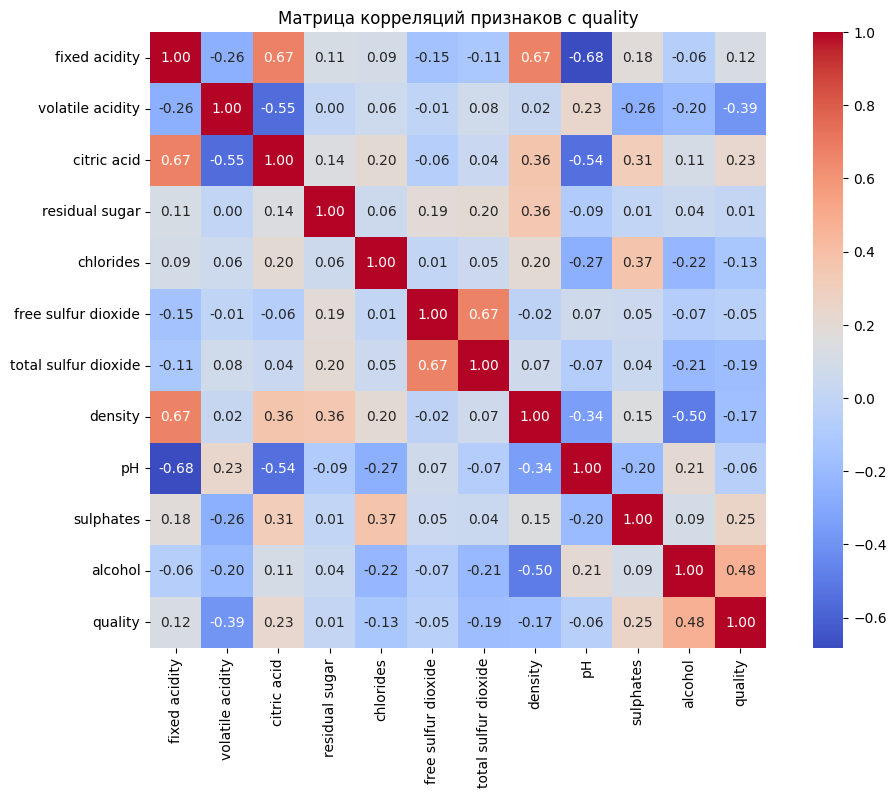

In [ ]:
# 4. Матрица корреляций (тепловая карта)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Матрица корреляций признаков с quality")
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

Корреляционная матрица показывает, что качество вина положительно коррелирует с содержанием алкоголя и сульфатов, а отрицательно с летучей кислотностью. Это указывает на важность снижения летучей кислотности(volatile acidity) и повышения алкоголя(alcohol) для улучшения качества.

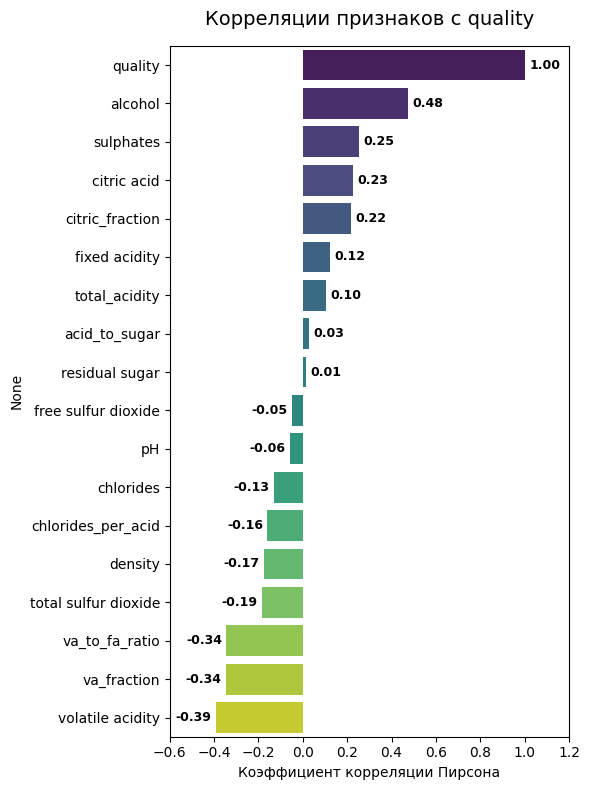

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Убираем 'quality' из числовых признаков, но добавляем его обратно для расчёта корреляции
num_cols = [c for c in df.columns if c != 'quality']
corr = df[num_cols + ['quality']].corr()['quality'].sort_values(ascending=False)

# Построение горизонтального barplot
plt.figure(figsize=(6, 8))
bars = sns.barplot(x=corr.values, y=corr.index, palette='viridis')

# Устанавливаем начало оси X на -0.8
plt.xlim(-0.6, corr.max() + 0.2)  # немного отступаем от максимума для читаемости

# Добавляем значения на бары
for i, value in enumerate(corr.values):
    # Сдвигаем текст, чтобы не перекрывалось с осью Y
    ha = 'left' if value >= 0 else 'right'
    offset = 0.02  # фиксированный небольшой отступ от бара
    x_pos = value + (offset if value >= 0 else -offset)
    plt.text(x_pos, i, f'{value:.2f}',
             va='center', ha=ha, fontweight='bold', fontsize=9,
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=1))

plt.title('Корреляции признаков с quality', fontsize=14, pad=15)
plt.xlabel('Коэффициент корреляции Пирсона')
plt.tight_layout()
plt.savefig('correlation_quality.png', dpi=300, bbox_inches='tight')
plt.show()

Корреляции с quality (барплот):
Наибольшая положительная корреляция с качеством (quality) у алкоголя(alcohol) +0.48, затем идут сульфаты(sulphates) +0.25 и лимонная кислота(citric acid) +0.23. Наибольшие отрицательные корреляции у летучей кислотности(volatile acidity) -0.39 и Общий SO₂(total sulfur dioxide) -0.19. Это подтверждает сильные влияния этих признаков на качество.

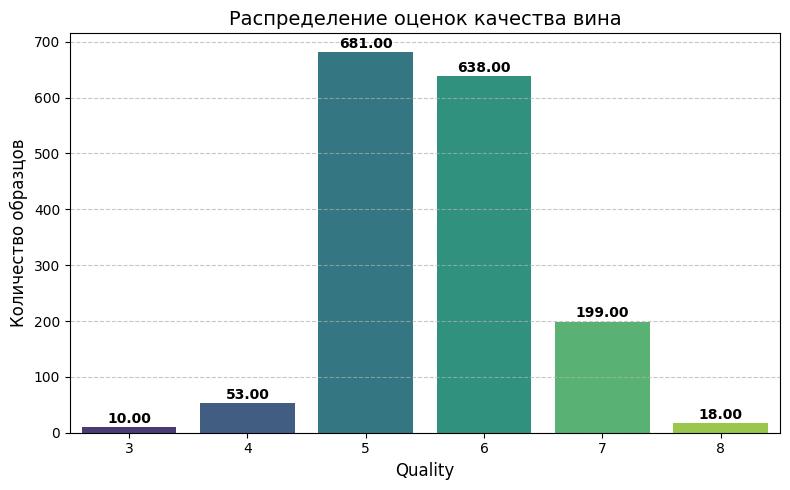

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='quality', data=df, palette='viridis')

# Добавляем значения на бары
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  # центр бара по X
        height + 2,                       # чуть выше вершины бара
        f'{height:.2f}',                  # формат с 2 знаками после запятой
        ha='center', va='bottom',         # выравнивание
        fontsize=10, fontweight='bold',
        color='black'
    )

plt.title("Распределение оценок качества вина", fontsize=14)
plt.xlabel("Quality", fontsize=12)
plt.ylabel("Количество образцов", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('quality_distr.png', dpi=300, bbox_inches='tight')
plt.show()

Гистограмма распределения quality:
Гистограмма показывает, что оценки качества 5 и 6 доминируют. Качество 3 и 8 встречается редко, это отражает естественный разброс качества вина в выборке.

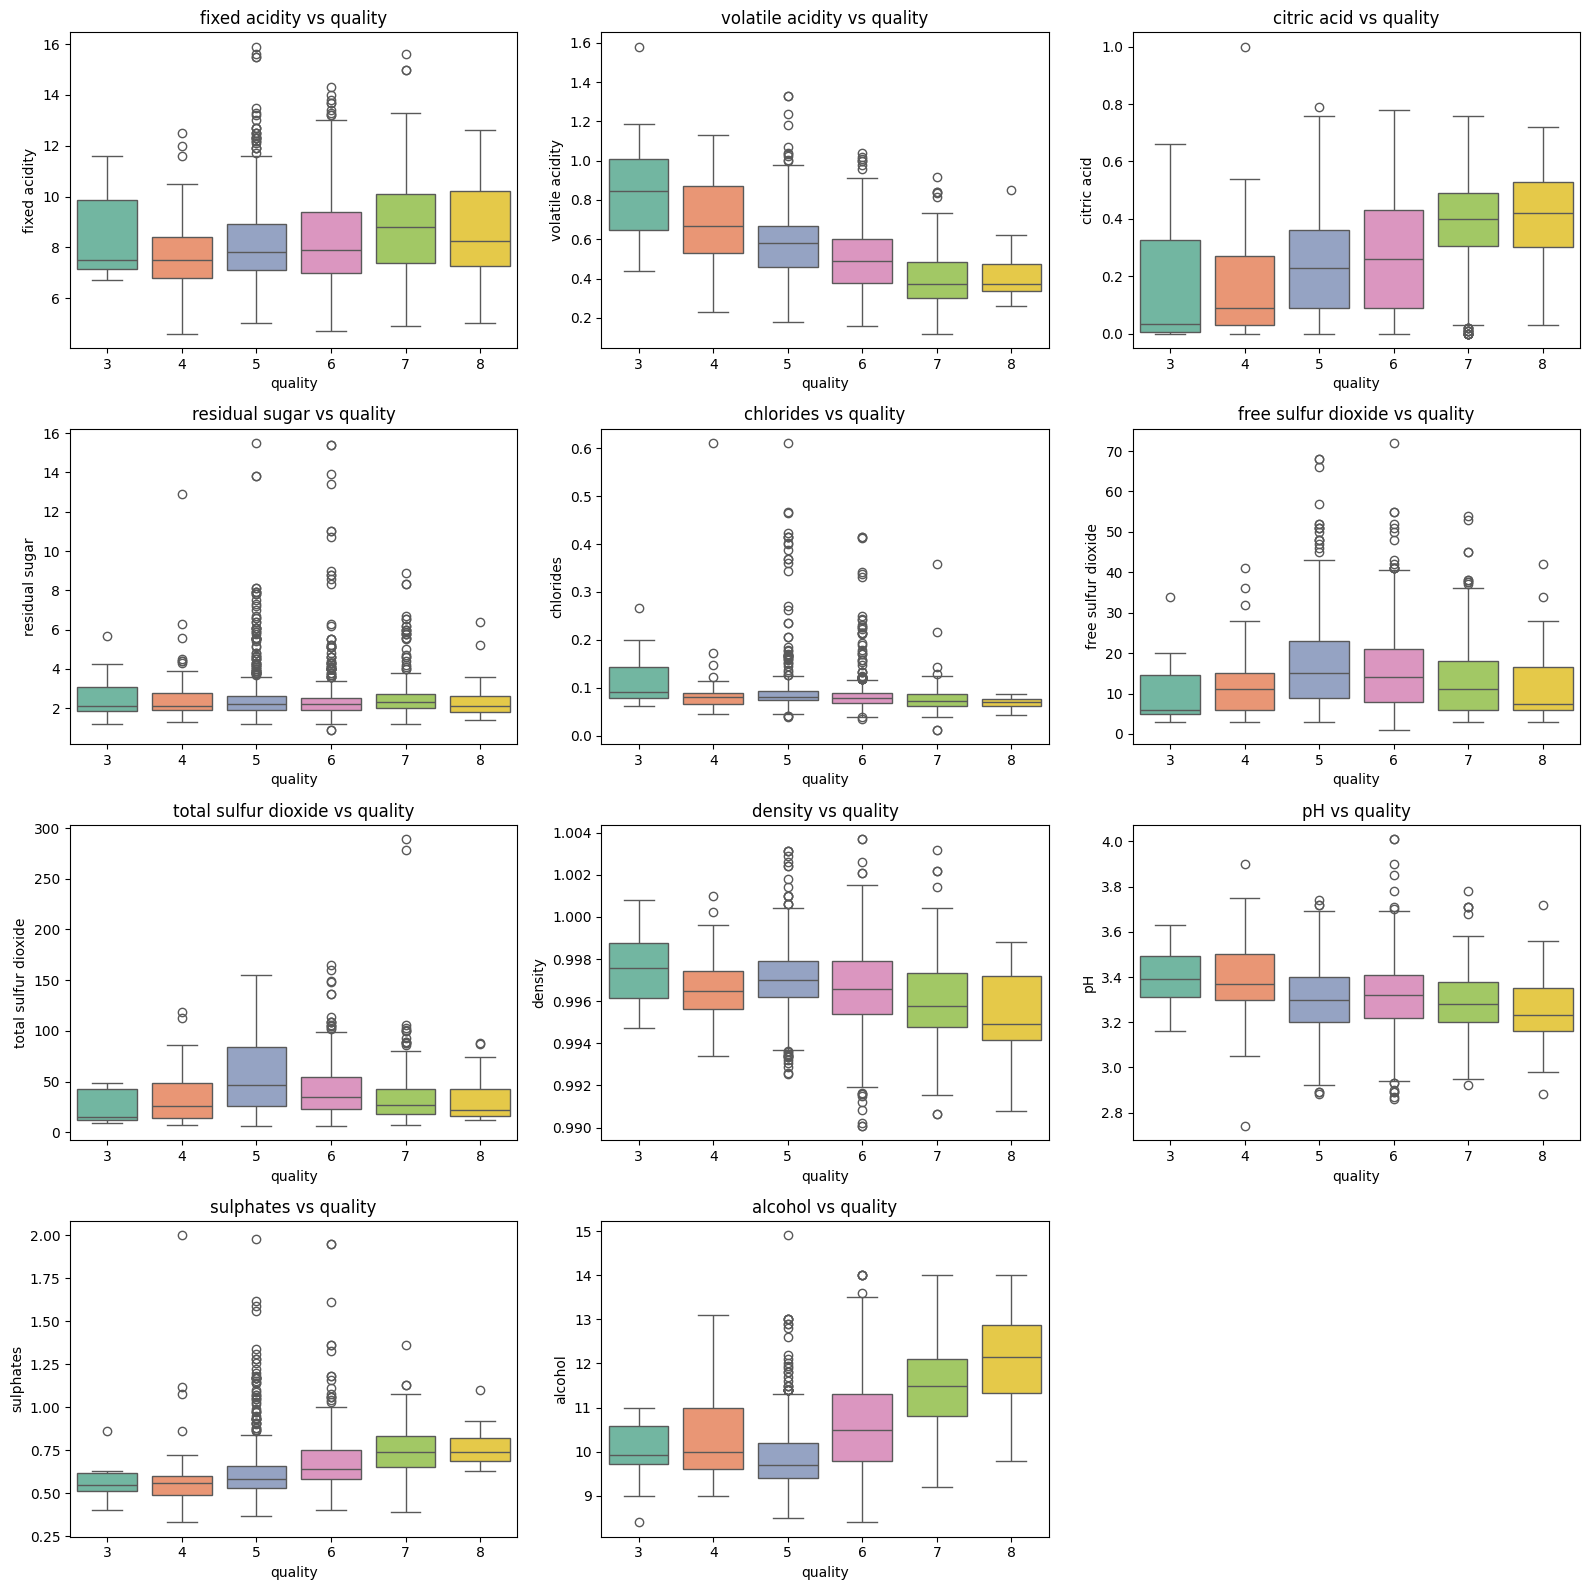

In [ ]:
# 7. Boxplot: как каждый признак зависит от quality
features = df.columns.drop('quality')
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x='quality', y=col, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} vs quality')

# Скрыть пустые subplot'ы
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig('quality_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

Boxplot признаки vs quality:
Boxplot для каждого признака по уровням качества выявляет тенденции: например, содержание алкоголя повышается с увеличением quality, а летучая кислотность уменьшается. Такие визуализации наглядно показывают влияние химических параметров на качество.

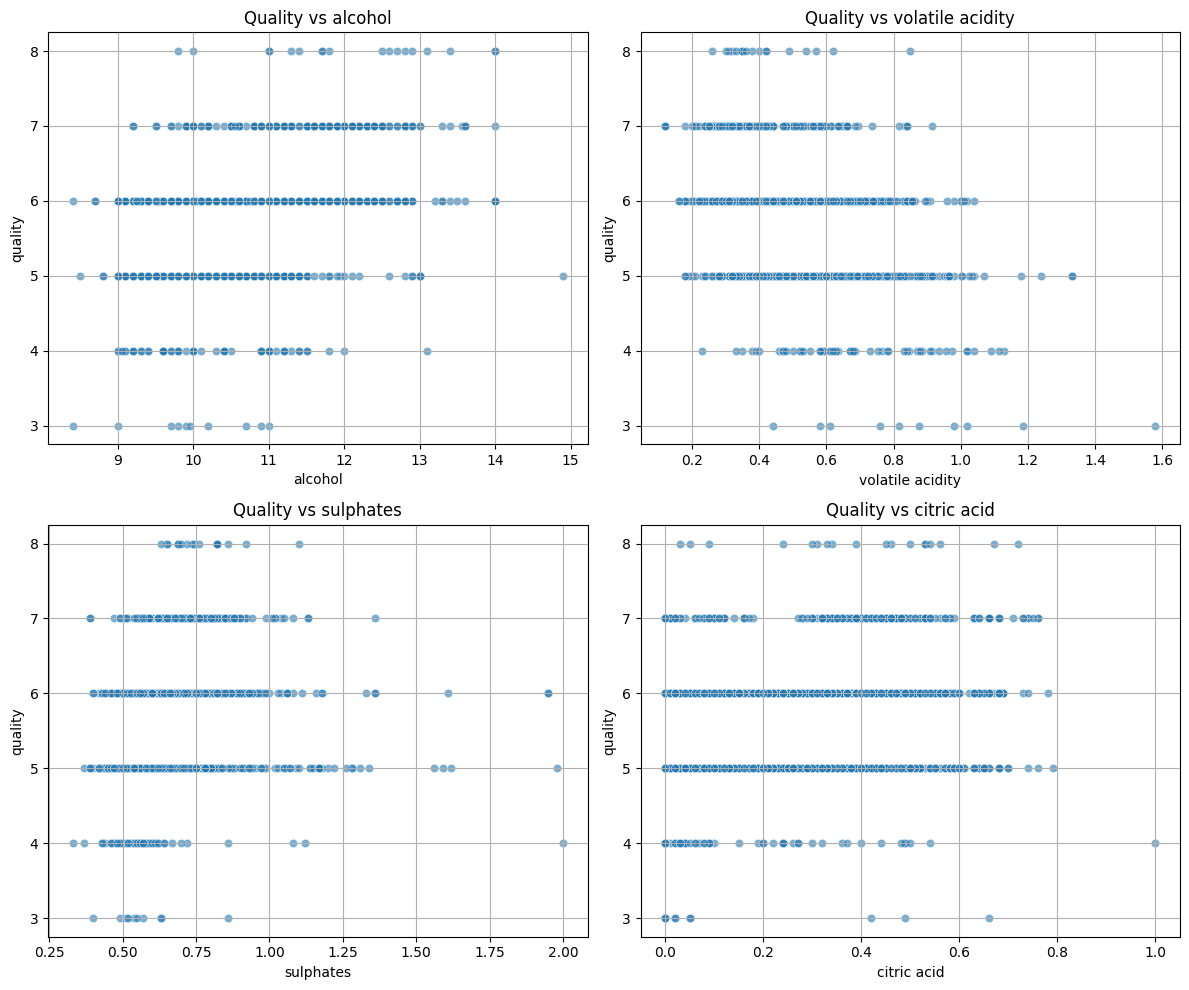

In [ ]:
# 8. Scatter plots: примеры зависимости quality от ключевых признаков
key_features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feat in enumerate(key_features):
    sns.scatterplot(x=feat, y='quality', data=df, alpha=0.6, ax=axes[i])
    axes[i].set_title(f'Quality vs {feat}')
    axes[i].grid(True)

plt.tight_layout()
plt.savefig('quality_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

Scatter plots для ключевых признаков:
Scatter plots подтверждают корреляции: алкоголь и сульфаты имеют явное положительное влияние на качество, летучая кислотность — отрицательное. Лимонная кислота показывает более слабую, но положительную зависимость.

In [ ]:
# 9. Производные признаки
eps = 1e-6

df['total_acidity'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']
df['va_to_fa_ratio'] = df['volatile acidity'] / (df['fixed acidity'] + eps)
df['acid_to_sugar'] = df['total_acidity'] / (df['residual sugar'] + eps)
df['va_fraction'] = df['volatile acidity'] / (df['total_acidity'] + eps)
df['chlorides_per_acid'] = df['chlorides'] / (df['total_acidity'] + eps)
df['citric_fraction'] = df['citric acid'] / (df['total_acidity'] + eps)

print("✅ Производные признаки добавлены.")
# Оценка корреляций новых признаков с quality
# corr_new = df.corr(numeric_only=True)['quality'].sort_values(ascending=False)
# print(corr_new.head(15))

✅ Производные признаки добавлены.


Производные признаки:
Добавление новых производных признаков расширяет пространство анализа, позволяя лучше описывать кислотность и её соотношения с другими веществами.

In [ ]:
# 10. Корреляция всех признаков с quality
corr_with_quality = df.corr()['quality'].sort_values(key=abs, ascending=False)
print("Корреляция признаков с quality (по модулю):")
print(corr_with_quality)

Корреляция признаков с quality (по модулю):
quality                 1.000000
alcohol                 0.476166
volatile acidity       -0.390558
va_fraction            -0.344821
va_to_fa_ratio         -0.343905
sulphates               0.251397
citric acid             0.226373
citric_fraction         0.219001
total sulfur dioxide   -0.185100
density                -0.174919
chlorides_per_acid     -0.159140
chlorides              -0.128907
fixed acidity           0.124052
total_acidity           0.103754
pH                     -0.057731
free sulfur dioxide    -0.050656
acid_to_sugar           0.029287
residual sugar          0.013732
Name: quality, dtype: float64


Корреляция новых признаков с quality:
Корреляция с quality по модулю сильна у volatile acidity, va_fraction, va_to_fa_ratio, а также положительна у алкоголя, сульфатов и цитратной фракции. Это подтверждает важность новых признаков.

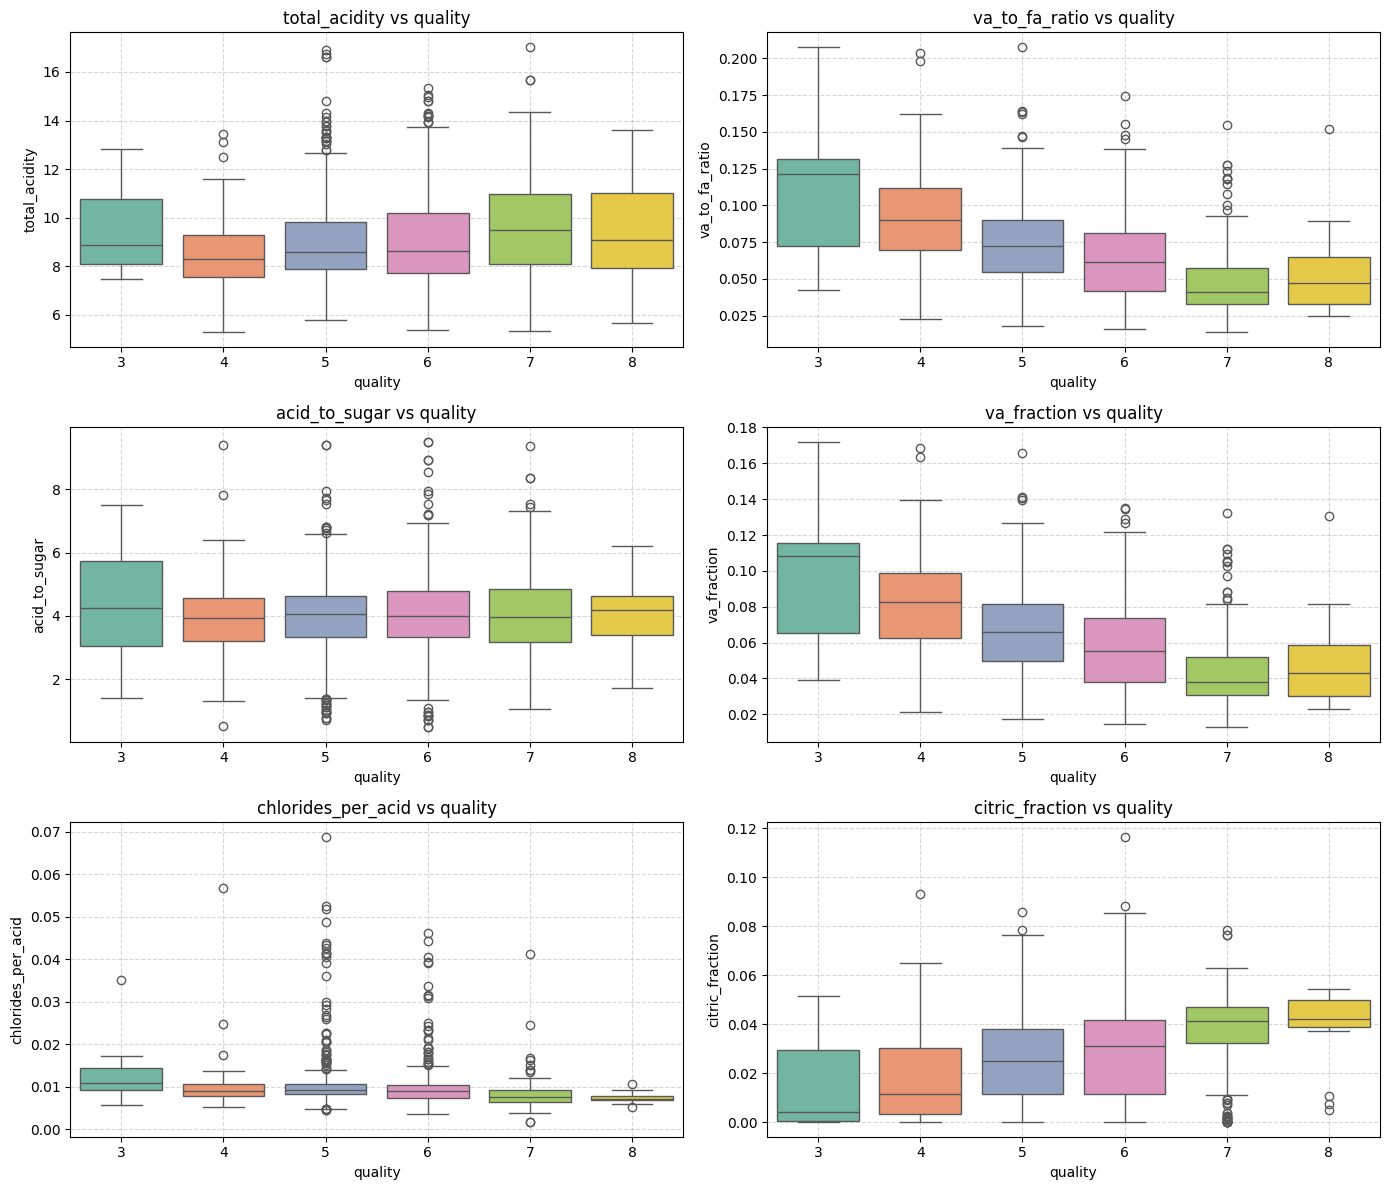

In [ ]:
# 11. Визуализация: Boxplot для производных признаков vs quality
derived_features = [
    'total_acidity',
    'va_to_fa_ratio',
    'acid_to_sugar',
    'va_fraction',
    'chlorides_per_acid',
    'citric_fraction'
]

n = len(derived_features)
cols = 2
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows))
axes = axes.flatten()

for i, feat in enumerate(derived_features):
    sns.boxplot(x='quality', y=feat, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feat} vs quality')
    axes[i].grid(True, ls='--', alpha=0.5)

# Скрыть лишние subplot'ы
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig('derived_features.png', dpi=300, bbox_inches='tight')
plt.show()

Визуализация производных признаков:
Boxplot показывает, что:
Соотношение летучих и фиксированных кислот (VA/FA Ratio)(va_to_fa_ratio) снижается при увеличении качества(quality),Общая кислотность(total_acidity) слабо влиет на quality, Индекс «Чистоты» кислотного профиля (Citric Acid Fraction) значительно увеличивается с ростом качества. Это визуально подтверждает числовые корреляции.

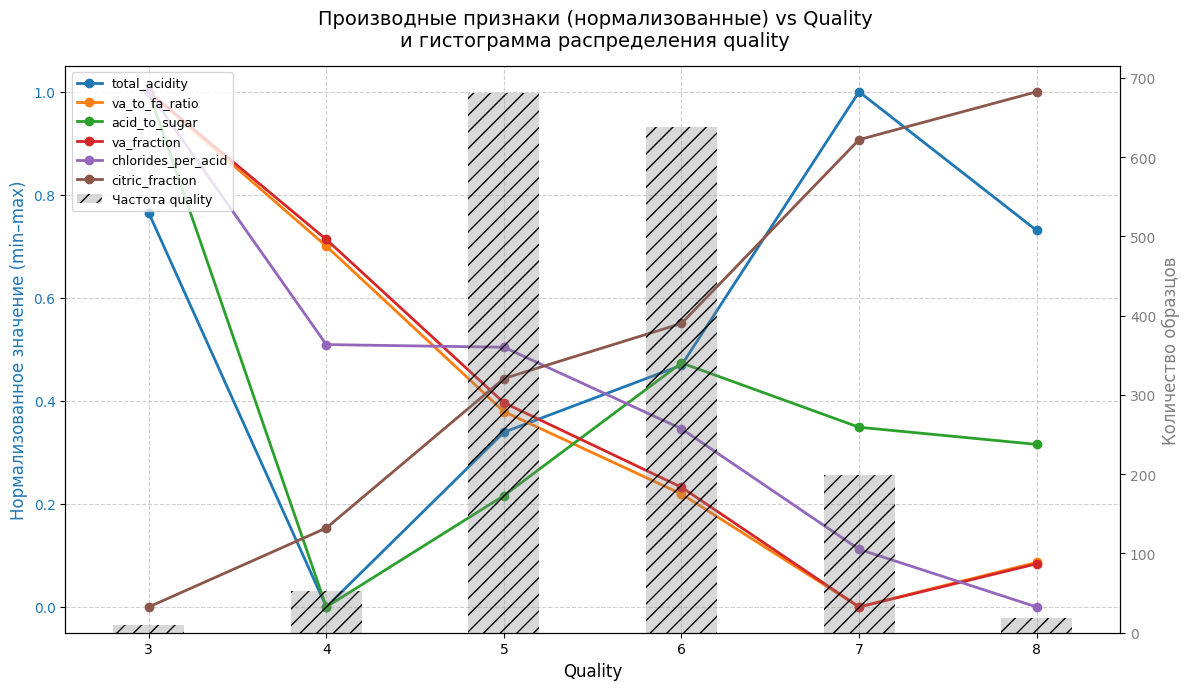

In [ ]:
# 12. Визуализация производных признаков
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# ——— 1. Загрузка и обработка данных ———
# df = pd.read_csv('winequality-red.csv')

# Создание производных признаков
eps = 1e-6
df['total_acidity'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']
df['va_to_fa_ratio'] = df['volatile acidity'] / (df['fixed acidity'] + eps)
df['acid_to_sugar'] = df['total_acidity'] / (df['residual sugar'] + eps)
df['va_fraction'] = df['volatile acidity'] / (df['total_acidity'] + eps)
df['chlorides_per_acid'] = df['chlorides'] / (df['total_acidity'] + eps)
df['citric_fraction'] = df['citric acid'] / (df['total_acidity'] + eps)

derived_features = [
    'total_acidity',
    'va_to_fa_ratio',
    'acid_to_sugar',
    'va_fraction',
    'chlorides_per_acid',
    'citric_fraction'
]

# Группировка и нормализация
grouped = df.groupby('quality')[derived_features].mean()
grouped_norm = (grouped - grouped.min()) / (grouped.max() - grouped.min() + eps)

# Распределение quality для гистограммы (частоты по каждому значению)
quality_counts = df['quality'].value_counts().sort_index()
quality_vals = quality_counts.index
quality_freq = quality_counts.values

# ——— 2. Построение графика ———
fig, ax1 = plt.subplots(figsize=(12, 7))

# — Линии: производные признаки vs quality
for feature in derived_features:
    ax1.plot(grouped_norm.index, grouped_norm[feature], marker='o', linewidth=2, label=feature)

ax1.set_xlabel('Quality', fontsize=12)
ax1.set_ylabel('Нормализованное значение (min–max)', fontsize=12, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_xticks(sorted(df['quality'].unique()))

# — Вторая ось: гистограмма quality
ax2 = ax1.twinx()
ax2.bar(quality_vals, quality_freq, width=0.4, alpha=0.3, color='gray', label='Частота quality', hatch='//')
ax2.set_ylabel('Количество образцов', fontsize=12, color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# — Легенда и оформление
fig.suptitle('Производные признаки (нормализованные) vs Quality\nи гистограмма распределения quality', fontsize=14)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig('derived_features_gist.png', dpi=300, bbox_inches='tight')
plt.show()

Качество красного вина в выборке возрастает на фоне снижения относительного вклада летучей кислотности и роста доли лимонной кислоты; одновременно спиртуозность и сульфаты остаются ключевыми позитивными маркерами, тогда как избыточная летучая кислота — негативным индикатором.

**​Тренды по производным признакам**

Метрики баланса летучей к фиксированной кислотности убывают с ростом качества: va_to_fa_ratio и va_fraction ниже у высоких оценок, что отражает нежелательность доминирования летучих кислот для сенсорики.

citric_fraction демонстрирует восходящий тренд по шкале quality, указывая на связь более «чистого» кислотного профиля с лучшей оценкой; total_acidity меняется слабее и сам по себе менее информативен.

acid_to_sugar не показывает устойчиво монотонной зависимости, подтверждая, что общий «баланс кислота–сладость» важен контекстно и не сводится к простой пропорции.

**Инсайты для признакового пространства**

Относительные показатели (доли и отношения) несут больше дискриминационной информации, чем абсолютная сумма кислот: нормализация на общий фон высвечивает качественные сдвиги профиля кислотности.

Противонаправленные тренды va_fraction и citric_fraction усиливают интерпретируемость: снижение доли летучей кислоты и рост доли лимонной — согласованный маркер лучшего качества.

Включение отношений с фиксированной кислотой и остаточным сахаром полезно для гипотез о нелинейностях и взаимодействиях в последующих моделях (например, полиномиальные термы, взаимодействия).

# **Общий вывод**


### 🎯 **Общий вывод**

Проведённый анализ датасета *«Red Wine Quality»* позволил глубоко изучить взаимосвязь химико-физических параметров вина с его субъективной оценкой качества (шкала от 3 до 8). Основные выводы:

#### 🔍 **1. Ключевые признаки, влияющие на качество**
- **Наибольшее положительное влияние**:  
  ✅ **Алкоголь (`alcohol`, r = +0.48)** — один из самых сильных маркеров качества.  
  ✅ **Сульфаты (`sulphates`, r = +0.25)** — часто связаны с сохранностью и структурой вина.  
  ✅ **Лимонная кислота (`citric acid`, r = +0.23)** — придаёт свежесть и фруктовость.

- **Наибольшее отрицательное влияние**:  
  ❌ **Летучая кислотность (`volatile acidity`, r = −0.39)** — особенно уксусная кислота, маркер окисления и порчи.  
  ❌ **Общий SO₂ (`total sulfur dioxide`, r = −0.19)** — высокие дозы могут быть признаком коррекции дефектов.

---

#### ⚙️ **2. Инженерия признаков даёт прирост информативности**
Производные признаки, особенно **нормализованные отношения**, усиливают предиктивную силу и интерпретируемость:
- **`va_fraction`** и **`va_to_fa_ratio`** имеют **более сильную отрицательную корреляцию** с качеством, чем исходная `volatile acidity`.
- **`citric_fraction`** показывает устойчивый рост с увеличением `quality`, подчёркивая значимость *профиля* кислот, а не только их суммы (`total_acidity`).
- **`acid_to_sugar`** и **`chlorides_per_acid`** помогают учесть балансы, важные для вкусового восприятия.

> 💡 **Инсайт**: *Относительные* меры (доли, соотношения) часто информативнее абсолютных — они нивелируют масштаб и отражают внутренний химический баланс.

---

#### 📊 **3. Распределение качества и надёжность трендов**
- **Дисбаланс классов**: 82 % образцов оценены на **5 или 6**, в то время как **3 и 8** составляют менее 1.5 % выборки.  
  → При построении моделей требуется балансировка или бинаризация (`good` = ≥6 vs `bad` < 6).
- **Тренды надёжны** в диапазоне `quality = 5–7` (где много данных), но **могут быть шумными на границах** (3, 4, 8).

---

#### 🧠 **4. Рекомендации для моделирования**
- Для классификации/регрессии рекомендуется использовать **комбинированный набор признаков**:
  - Исходные (`alcohol`, `volatile acidity`, `sulphates`)
  - Инженерные (`va_fraction`, `citric_fraction`, `va_to_fa_ratio`)
- Пробовать:
  - **Random Forest / Gradient Boosting** — для интерпретации важности признаков.
  - **Logistic Regression + полиномиальные взаимодействия** — для проверки гипотез о нелинейных балансах.
  - **Кластеризацию (например, k-means)** — чтобы выявить типы «винного профиля».

---

#### 🍷 **Практический вывод для виноделия**
Чтобы повысить субъективное качество красного вина, следует:
1. **Минимизировать долю летучих кислот** (особенно уксусной),
2. **Поддерживать умеренно высокий уровень алкоголя** (~10–12 %),
3. **Обогащать профиль лимонной кислотой**, сохранив общий кислотный баланс,
4. **Контролировать соотношения**, а не только абсолютные концентрации.

---

✅ **Заключение**:  
Химический состав вина содержит достаточно информации для объяснения и прогнозирования его качества. Комбинирование классического EDA, инженерии признаков и визуализации позволяет не только строить модели, но и получать **интерпретируемые, технологически значимые выводы** — мост между data science и реальным производством.

### 🎯 **Общий вывод**

Проведённый анализ датасета *«Red Wine Quality»* позволил глубоко изучить взаимосвязь химико-физических параметров вина с его субъективной оценкой качества (шкала от 3 до 8). Основные выводы:

#### 🔍 **1. Ключевые признаки, влияющие на качество**
- **Наибольшее положительное влияние**:  
  ✅ **Алкоголь (`alcohol`, r = +0.48)** — один из самых сильных маркеров качества.  
  ✅ **Сульфаты (`sulphates`, r = +0.25)** — часто связаны с сохранностью и структурой вина.  
  ✅ **Лимонная кислота (`citric acid`, r = +0.23)** — придаёт свежесть и фруктовость.

- **Наибольшее отрицательное влияние**:  
  ❌ **Летучая кислотность (`volatile acidity`, r = −0.39)** — особенно уксусная кислота, маркер окисления и порчи.  
  ❌ **Общий SO₂ (`total sulfur dioxide`, r = −0.19)** — высокие дозы могут быть признаком коррекции дефектов.

---

#### ⚙️ **2. Инженерия признаков даёт прирост информативности**
Производные признаки, особенно **нормализованные отношения**, усиливают предиктивную силу и интерпретируемость:
- **`va_fraction`** и **`va_to_fa_ratio`** имеют **более сильную отрицательную корреляцию** с качеством, чем исходная `volatile acidity`.
- **`citric_fraction`** показывает устойчивый рост с увеличением `quality`, подчёркивая значимость *профиля* кислот, а не только их суммы (`total_acidity`).
- **`acid_to_sugar`** и **`chlorides_per_acid`** помогают учесть балансы, важные для вкусового восприятия.

> 💡 **Инсайт**: *Относительные* меры (доли, соотношения) часто информативнее абсолютных — они нивелируют масштаб и отражают внутренний химический баланс.

---

#### 📊 **3. Распределение качества и надёжность трендов**
- **Дисбаланс классов**: 82 % образцов оценены на **5 или 6**, в то время как **3 и 8** составляют менее 1.5 % выборки.  
  → При построении моделей требуется балансировка или бинаризация (`good` = ≥6 vs `bad` < 6).
- **Тренды надёжны** в диапазоне `quality = 5–7` (где много данных), но **могут быть шумными на границах** (3, 4, 8).

---

#### 🧠 **4. Рекомендации для моделирования**
- Для классификации/регрессии рекомендуется использовать **комбинированный набор признаков**:
  - Исходные (`alcohol`, `volatile acidity`, `sulphates`)
  - Инженерные (`va_fraction`, `citric_fraction`, `va_to_fa_ratio`)
- Пробовать:
  - **Random Forest / Gradient Boosting** — для интерпретации важности признаков.
  - **Logistic Regression + полиномиальные взаимодействия** — для проверки гипотез о нелинейных балансах.
  - **Кластеризацию (например, k-means)** — чтобы выявить типы «винного профиля».

---

#### 🍷 **Практический вывод для виноделия**
Чтобы повысить субъективное качество красного вина, следует:
1. **Минимизировать долю летучих кислот** (особенно уксусной),
2. **Поддерживать умеренно высокий уровень алкоголя** (~10–12 %),
3. **Обогащать профиль лимонной кислотой**, сохранив общий кислотный баланс,
4. **Контролировать соотношения**, а не только абсолютные концентрации.

---

✅ **Заключение**:  
Химический состав вина содержит достаточно информации для объяснения и прогнозирования его качества. Комбинирование классического EDA, инженерии признаков и визуализации позволяет не только строить модели, но и получать **интерпретируемые, технологически значимые выводы** — мост между data science и реальным производством.

### 🎯 **Общий вывод**

Проведённый анализ датасета *«Red Wine Quality»* позволил глубоко изучить взаимосвязь химико-физических параметров вина с его субъективной оценкой качества (шкала от 3 до 8). Основные выводы:

#### 🔍 **1. Ключевые признаки, влияющие на качество**
- **Наибольшее положительное влияние**:  
  ✅ **Алкоголь (`alcohol`, r = +0.48)** — один из самых сильных маркеров качества.  
  ✅ **Сульфаты (`sulphates`, r = +0.25)** — часто связаны с сохранностью и структурой вина.  
  ✅ **Лимонная кислота (`citric acid`, r = +0.23)** — придаёт свежесть и фруктовость.

- **Наибольшее отрицательное влияние**:  
  ❌ **Летучая кислотность (`volatile acidity`, r = −0.39)** — особенно уксусная кислота, маркер окисления и порчи.  
  ❌ **Общий SO₂ (`total sulfur dioxide`, r = −0.19)** — высокие дозы могут быть признаком коррекции дефектов.

---

#### ⚙️ **2. Инженерия признаков даёт прирост информативности**
Производные признаки, особенно **нормализованные отношения**, усиливают предиктивную силу и интерпретируемость:
- **`va_fraction`** и **`va_to_fa_ratio`** имеют **более сильную отрицательную корреляцию** с качеством, чем исходная `volatile acidity`.
- **`citric_fraction`** показывает устойчивый рост с увеличением `quality`, подчёркивая значимость *профиля* кислот, а не только их суммы (`total_acidity`).
- **`acid_to_sugar`** и **`chlorides_per_acid`** помогают учесть балансы, важные для вкусового восприятия.

> 💡 **Инсайт**: *Относительные* меры (доли, соотношения) часто информативнее абсолютных — они нивелируют масштаб и отражают внутренний химический баланс.

---

#### 📊 **3. Распределение качества и надёжность трендов**
- **Дисбаланс классов**: 82 % образцов оценены на **5 или 6**, в то время как **3 и 8** составляют менее 1.5 % выборки.  
  → При построении моделей требуется балансировка или бинаризация (`good` = ≥6 vs `bad` < 6).
- **Тренды надёжны** в диапазоне `quality = 5–7` (где много данных), но **могут быть шумными на границах** (3, 4, 8).

---

#### 🧠 **4. Рекомендации для моделирования**
- Для классификации/регрессии рекомендуется использовать **комбинированный набор признаков**:
  - Исходные (`alcohol`, `volatile acidity`, `sulphates`)
  - Инженерные (`va_fraction`, `citric_fraction`, `va_to_fa_ratio`)
- Пробовать:
  - **Random Forest / Gradient Boosting** — для интерпретации важности признаков.
  - **Logistic Regression + полиномиальные взаимодействия** — для проверки гипотез о нелинейных балансах.
  - **Кластеризацию (например, k-means)** — чтобы выявить типы «винного профиля».

---

#### 🍷 **Практический вывод для виноделия**
Чтобы повысить субъективное качество красного вина, следует:
1. **Минимизировать долю летучих кислот** (особенно уксусной),
2. **Поддерживать умеренно высокий уровень алкоголя** (~10–12 %),
3. **Обогащать профиль лимонной кислотой**, сохранив общий кислотный баланс,
4. **Контролировать соотношения**, а не только абсолютные концентрации.

---

✅ **Заключение**:  
Химический состав вина содержит достаточно информации для объяснения и прогнозирования его качества. Комбинирование классического EDA, инженерии признаков и визуализации позволяет не только строить модели, но и получать **интерпретируемые, технологически значимые выводы** — мост между data science и реальным производством.

